In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler

% matplotlib inline

# Exploratory Data Analysis

## Process and Merge Datasets

In [2]:
white_wine = pd.read_csv("winequality-white.csv", sep=';')
red_wine = pd.read_csv("winequality-red.csv", sep=';')

red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

red_wine['quality_label'] = red_wine['quality'].apply(lambda value:'low' if value <=5 else "medium" if value<=7 else "high")
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value:'low' if value <=5 else "medium" if value<=7 else "high")
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


## Descriptive Statistics (thống kê mô tả)

In [4]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', "sulphates", "alcohol", "volatile acidity", "quality"]
rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)
pd.concat([rs, ws], axis=1, keys=["Red Wine Statistics", "White Wine Statistics"])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [5]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)
pd.concat([ls, ms, hs], axis=1, keys=["Low Quality Wine", "Medium Quality Wine", "High Quality Wine"])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

## Inferential Statistics (Thống kê suy luận)

In [6]:
from scipy import stats
 
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'], 
                      wines[wines['quality_label'] == 'medium']['alcohol'], 
                      wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'], 
                      wines[wines['quality_label'] == 'medium']['pH'], 
                      wines[wines['quality_label'] == 'high']['pH'])
print('\nANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266

ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: 1.2363860803545201 	p-value: 0.2905002779768688


Text(0,0.5,'Wine pH')

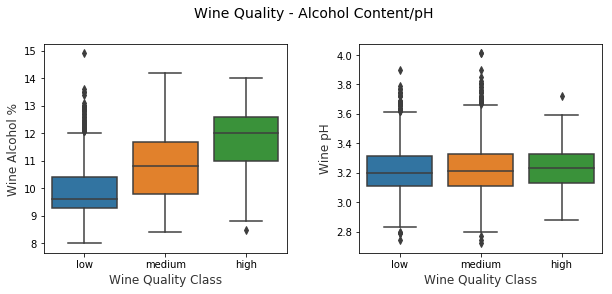

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Quality - Alcohol Content/pH', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="quality_label", y="alcohol",
            data=wines, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)

### Univariate Analysis

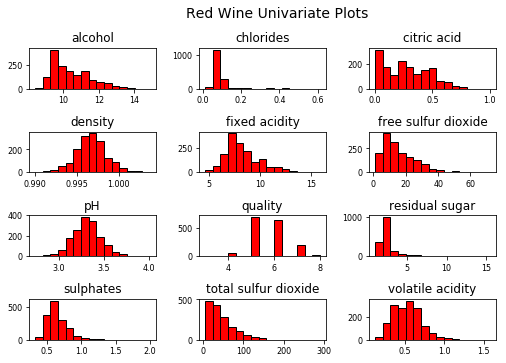

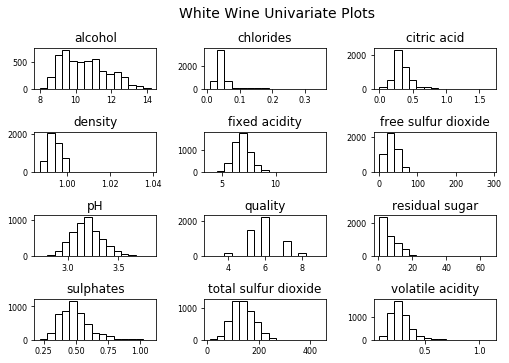

In [8]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)  

white_wine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)

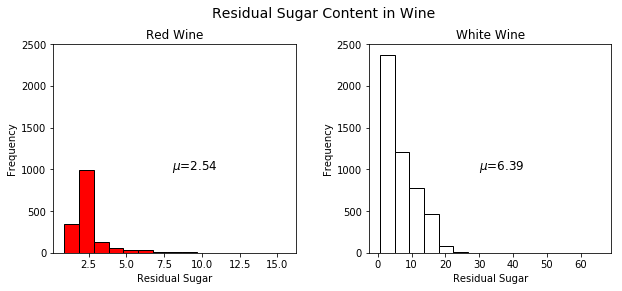

In [9]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

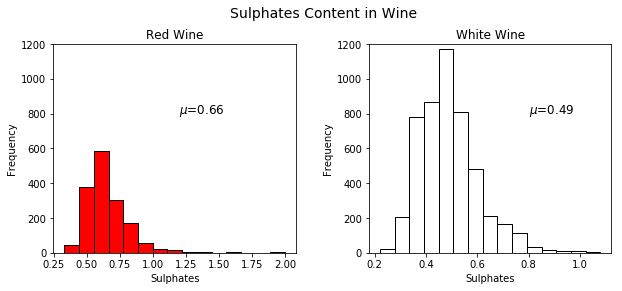

In [10]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

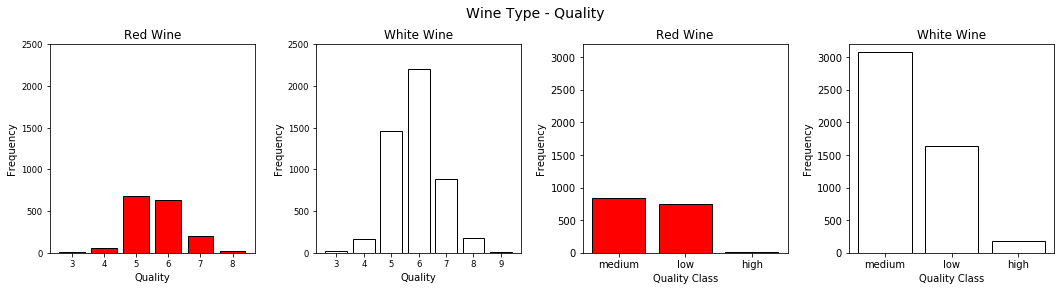

In [11]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = red_wine['quality_label'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', 
        edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = white_wine['quality_label'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', 
        edgecolor='black', linewidth=1, tick_label =ww_q[0])

### Multivariate Analysis

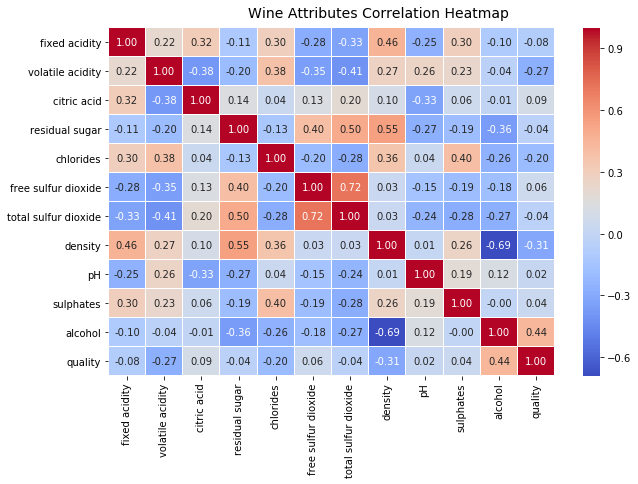

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

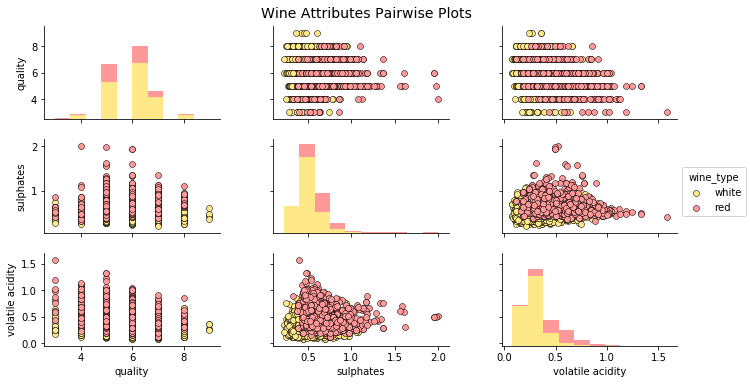

In [13]:
cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

/home/nhatanh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


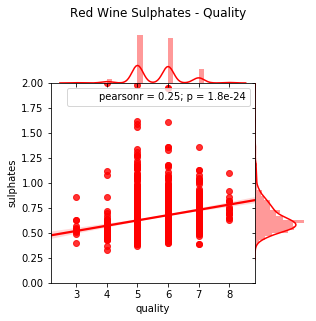

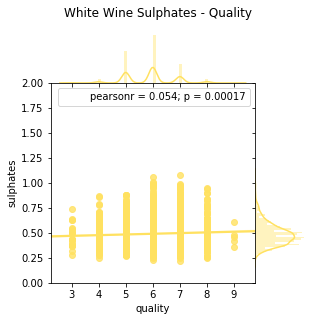

In [14]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
                   kind='reg', ylim=(0, 2),  
                   color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12)

wj = sns.jointplot(x='quality', y='sulphates', data=white_wine,
                   kind='reg', ylim=(0, 2),
                   color='#FFE160', space=0, size=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize=12)


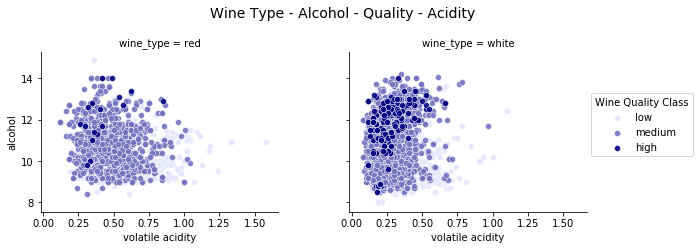

In [15]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

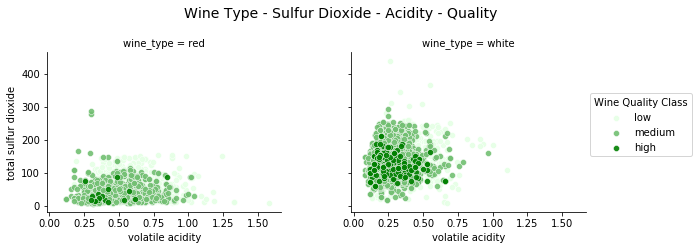

In [16]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

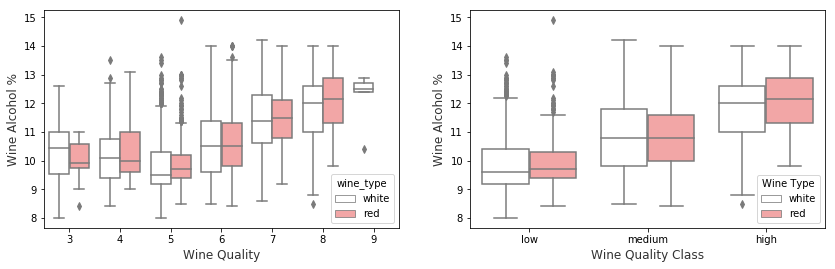

In [17]:

ff, ((ax1, ax2))= plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

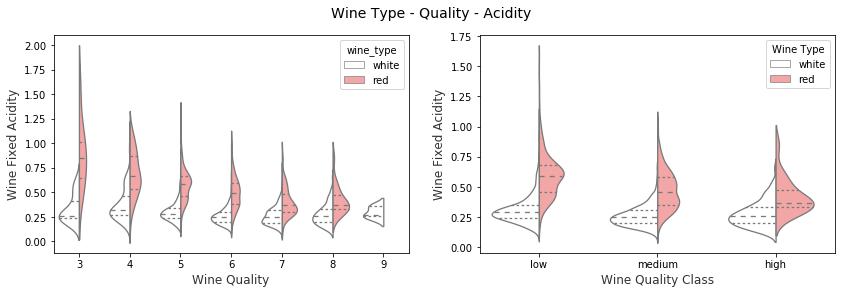

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality_label", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

# Modeling

## Predicting Wine Types

In [40]:
wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])
wtp_train_X, wtp_test_X,wtp_train_y, wtp_test_y = train_test_split(wtp_features, wtp_class_labels, test_size=0.3, random_state=42)

In [41]:
wtp_ss = StandardScaler().fit(wtp_train_X)
wtp_train_SX = wtp_ss.transform(wtp_train_X)
wtp_test_SX = wtp_ss.transform(wtp_test_X)

In [42]:
from sklearn.linear_model import LogisticRegression

wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
wtp_lr_predict = wtp_lr.predict(wtp_test_X)
meu.display_model_performance_metrics(true_labels=wtp_test_y,
                                     predicted_labels=wtp_lr_predict, classes=["red", "white"])

Model Performance metrics:
------------------------------
Accuracy: 0.7595
Precision: 0.8174
Recall: 0.7595
F1 Score: 0.6562

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        red       1.00      0.00      0.00       470
      white       0.76      1.00      0.86      1480

avg / total       0.82      0.76      0.66      1950


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red            1   469
        white          0  1480


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(wtp_train_y)
# encode wine type labels
wtp_train_ey = le.transform(wtp_train_y)
wtp_test_ey = le.transform(wtp_test_y)
wtp_train_ey

array([1, 0, 1, ..., 1, 0, 1])

In [45]:
from keras.models import Sequential
from keras.layers import Dense

wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(16, activation='relu', input_shape=(11, )))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(1, activation="sigmoid"))
wtp_dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history = wtp_dnn_model.fit(wtp_train_SX, wtp_train_ey, epochs=10, batch_size=5, shuffle=True, validation_split=0.1, verbose=1)

Train on 4092 samples, validate on 455 samples
Epoch 1/10
4092/4092 [==============================] - 1s 277us/step - loss: 0.1165 - acc: 0.9753 - val_loss: 0.0124 - val_acc: 0.9978
Epoch 2/10
4092/4092 [==============================] - 1s 210us/step - loss: 0.0311 - acc: 0.9934 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 3/10
4092/4092 [==============================] - 1s 196us/step - loss: 0.0236 - acc: 0.9954 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 4/10
4092/4092 [==============================] - 1s 186us/step - loss: 0.0212 - acc: 0.9956 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 5/10
4092/4092 [==============================] - 1s 185us/step - loss: 0.0181 - acc: 0.9966 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 6/10
4092/4092 [==============================] - 1s 189us/step - loss: 0.0168 - acc: 0.9966 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 7/10
4092/4092 [==============================] - 1s 186us/step - loss: 0.0144 - acc: 0.9966 - val_loss: 0.0020 - val_acc: 1.0000
E

In [47]:
wtp_dnn_ypred = wtp_dnn_model.predict_classes(wtp_test_SX)
wtp_dnn_predictions = le.inverse_transform(wtp_dnn_ypred)

/home/nhatanh/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


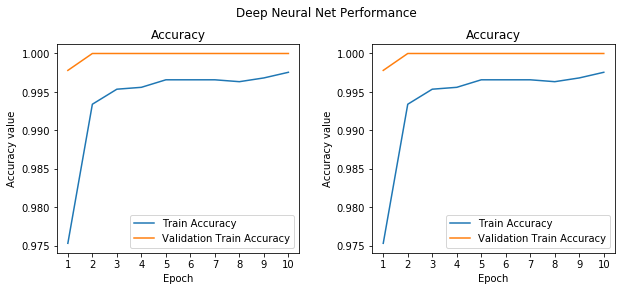

In [48]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
t = f.suptitle("Deep Neural Net Performance", fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1, 11))
ax1.plot(epochs, history.history['acc'], label="Train Accuracy")
ax1.plot(epochs, history.history['val_acc'], label="Validation Train Accuracy")
ax1.set_xticks(epochs)
ax1.set_ylabel("Accuracy value")
ax1.set_xlabel("Epoch")
ax1.set_title("Accuracy")
l1 = ax1.legend(loc='best')

ax2.plot(epochs, history.history['acc'], label="Train Accuracy")
ax2.plot(epochs, history.history['val_acc'], label="Validation Train Accuracy")
ax2.set_xticks(epochs)
ax2.set_ylabel("Accuracy value")
ax2.set_xlabel("Epoch")
ax2.set_title("Accuracy")
l2 = ax2.legend(loc='best')

In [49]:
meu.display_model_performance_metrics(true_labels=wtp_test_y,
                                     predicted_labels=wtp_lr_predict, classes=["red", "white"])

Model Performance metrics:
------------------------------
Accuracy: 0.7595
Precision: 0.8174
Recall: 0.7595
F1 Score: 0.6562

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        red       1.00      0.00      0.00       470
      white       0.76      1.00      0.86      1480

avg / total       0.82      0.76      0.66      1950


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red            1   469
        white          0  1480


## Model Interpretation

### View Feature importances

2018-08-01 15:48:13,741 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[11/11] features ████████████████████ Time elapsed: 0 seconds

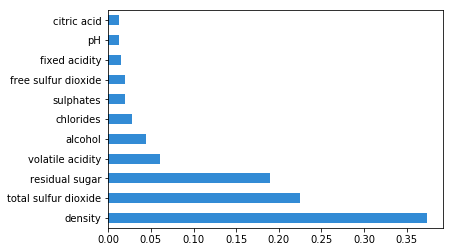

In [50]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

wtp_interpreter = Interpretation(wtp_test_SX, feature_names=wtp_features.columns)
wtp_im_model = InMemoryModel(wtp_lr.predict_proba, examples=wtp_train_SX, target_names=wtp_lr.classes_)
plots = wtp_interpreter.feature_importance.plot_feature_importance(wtp_im_model, ascending=False)

### View Model ROC Curve


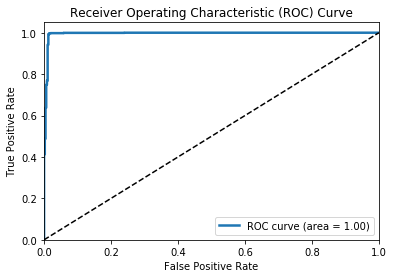

In [51]:
meu.plot_model_roc_curve(wtp_lr, wtp_test_SX, wtp_test_y)

### Visualize Model decision surface

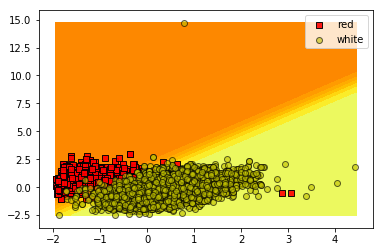

In [52]:
feature_indices = [i for i, feature in enumerate(wtp_feature_names) 
                       if feature in ['density', 'total sulfur dioxide']]
meu.plot_model_decision_surface(clf=wtp_lr, train_features=wtp_train_SX[:, feature_indices], 
                                train_labels=wtp_train_y, plot_step=0.02, cmap=plt.cm.Wistia_r,
                                markers=[',', 'o'], alphas=[0.9, 0.6], colors=['r', 'y'])